## Importing Necessary Libraries 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Dataset

In [2]:
# Load the dataset
df = pd.read_csv('diabetes-dataset.csv')  

 ## Displaying Basic Information about the Dataset

In [3]:
# Display basic information about the dataset
df_info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


## Displaying First Few Rows of the Dataset

In [4]:
# Display the first few rows of the dataset
df_head = df.head()
df_head

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


## Checking for Missing Values

In [5]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

## Statistical Summary of the Dataset

In [6]:
# Statistical summary of the dataset
statistical_summary = df.describe()
statistical_summary

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,3.703500,121.182500,69.145500,20.935000,80.254000,32.193000,0.470930,33.090500,0.342000
std,3.306063,32.068636,19.188315,16.103243,111.180534,8.149901,0.323553,11.786423,0.474498
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,63.500000,0.000000,0.000000,27.375000,0.244000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,40.000000,32.300000,0.376000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,32.000000,130.000000,36.800000,0.624000,40.000000,1.000000
max,17.000000,199.000000,122.000000,110.000000,744.000000,80.600000,2.420000,81.000000,1.000000


## Plotting Distributions of Each Feature

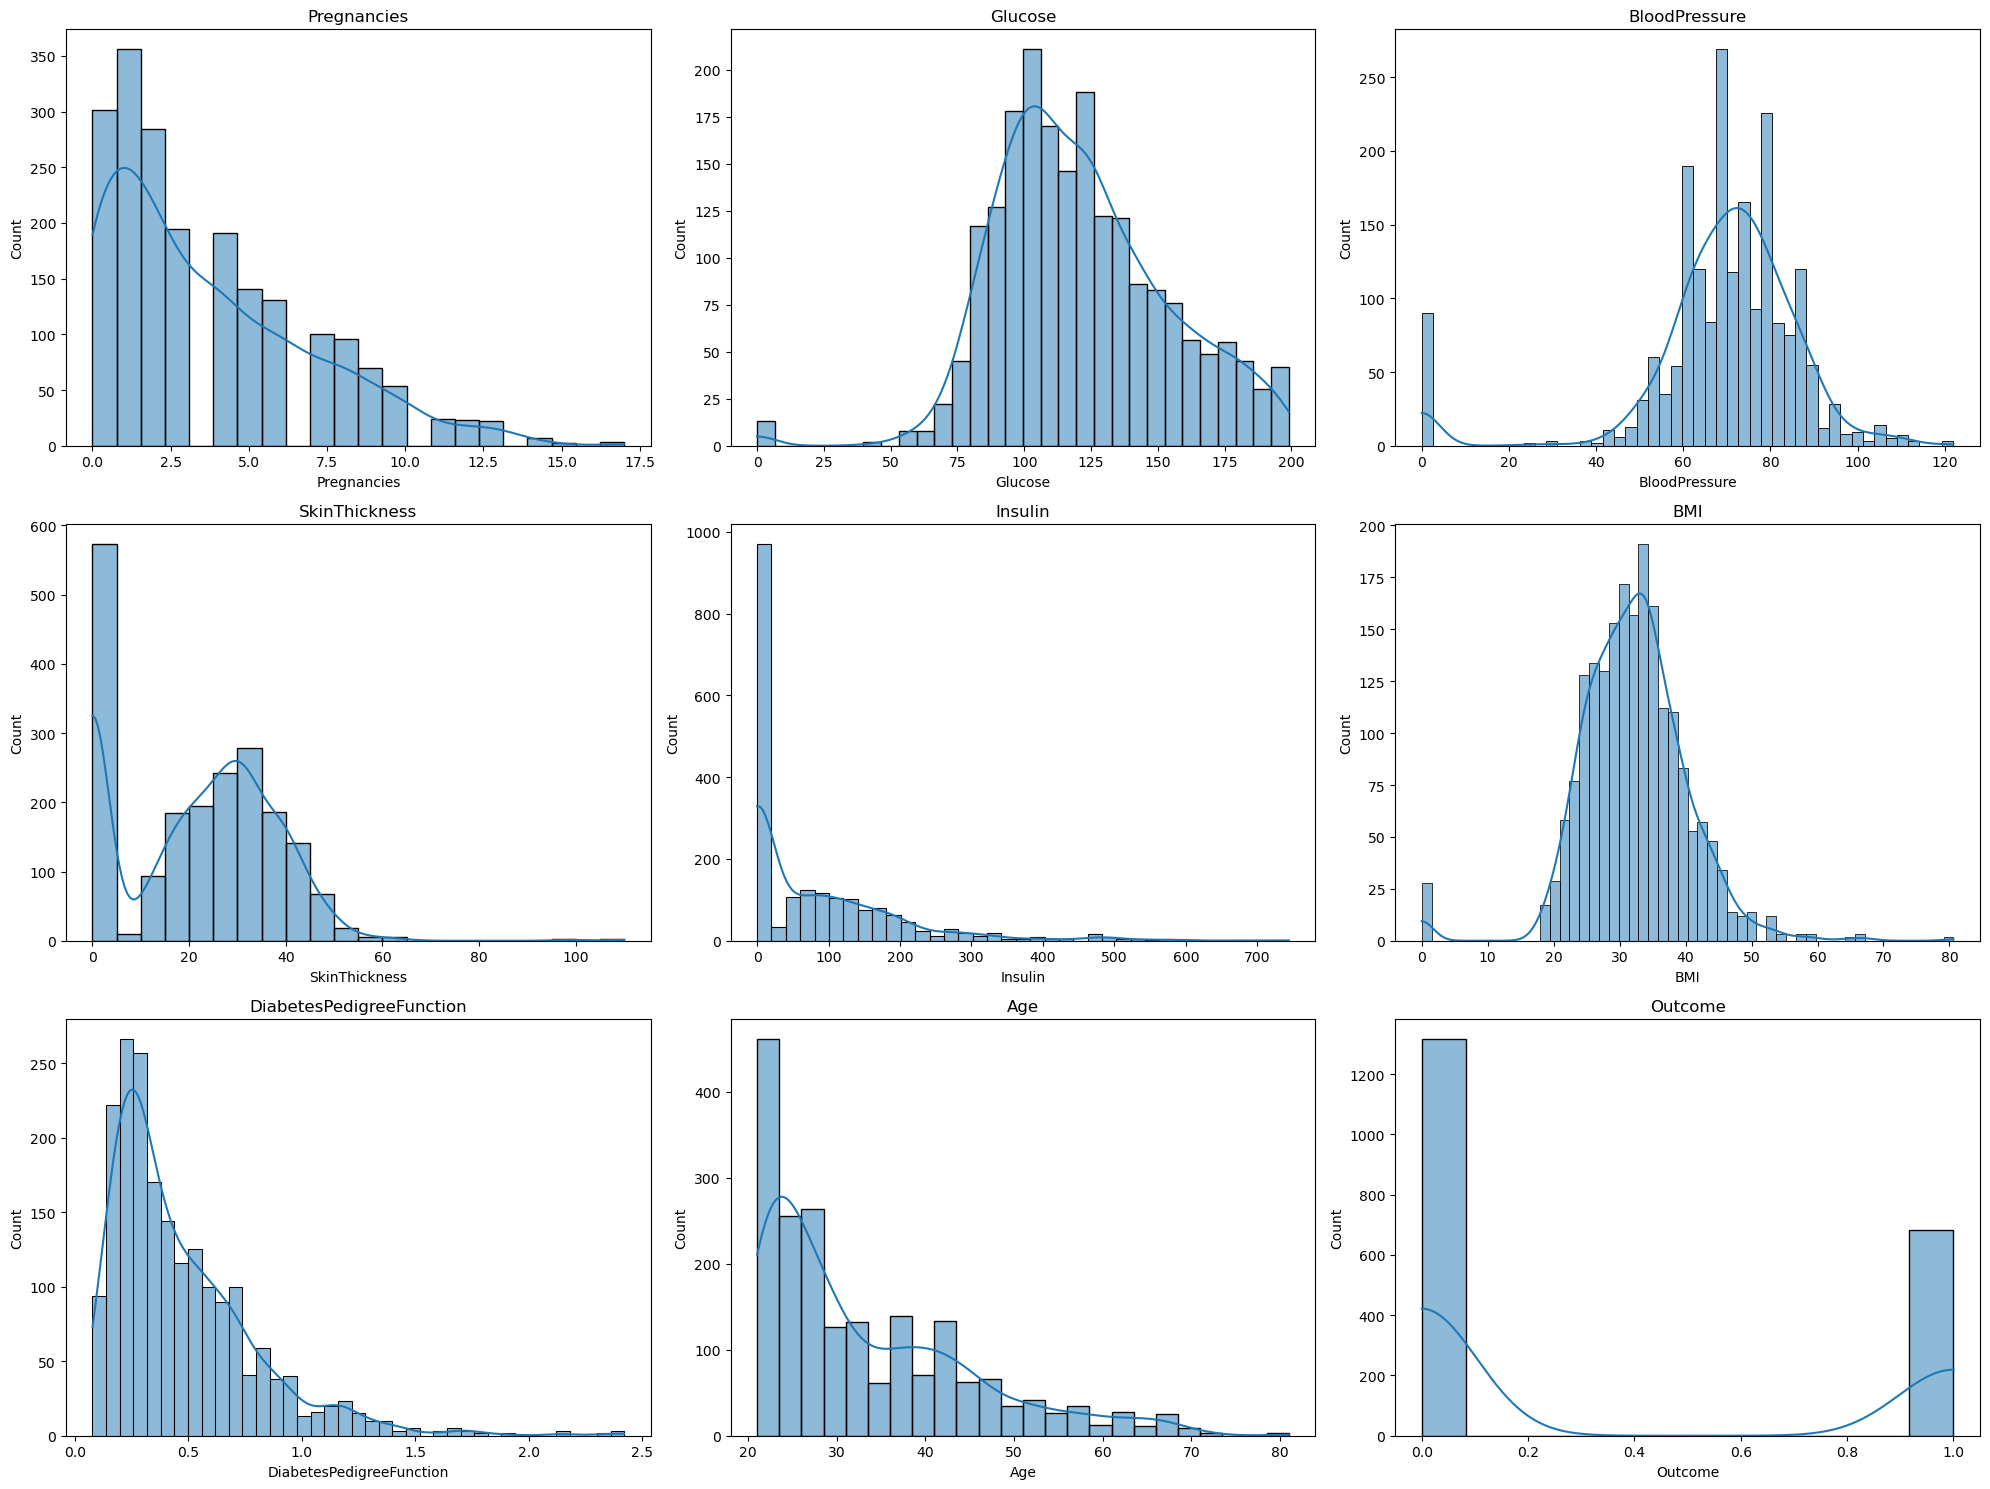

In [7]:
# Plotting distributions of each feature
plt.figure(figsize=(20, 15))
for i, column in enumerate(df.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(df[column], kde=True)
    plt.title(column)

plt.tight_layout()
plt.show()


## Investigate Zero Values

In [8]:
# Checking for zero values in key columns
zero_values = {}
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in columns_to_check:
    zero_values[col] = df[df[col] == 0].shape[0]

zero_values 

{'Glucose': 13,
 'BloodPressure': 90,
 'SkinThickness': 573,
 'Insulin': 956,
 'BMI': 28}

## Analyzing the Distribution of Features with Respect to the Outcome Variable

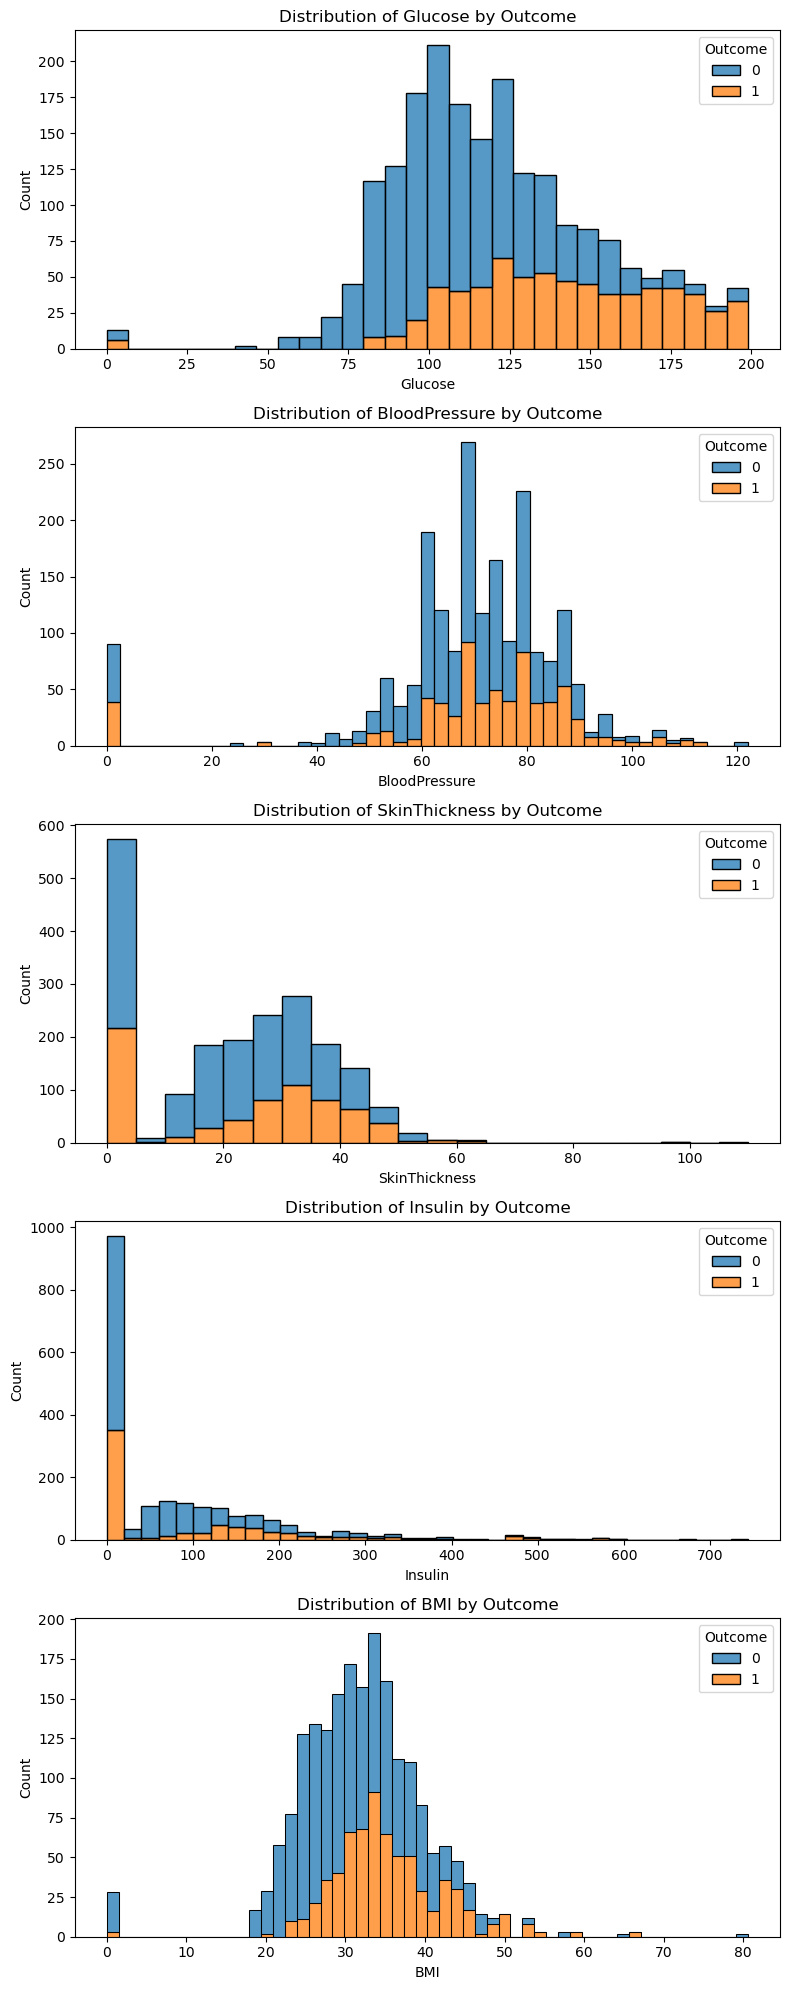

In [9]:
# Plotting distributions of features by Outcome
fig, axes = plt.subplots(len(columns_to_check), 1, figsize=(8, 20))
for i, col in enumerate(columns_to_check):
    sns.histplot(df, x=col, hue='Outcome', multiple='stack', ax=axes[i])
    axes[i].set_title(f'Distribution of {col} by Outcome')
plt.tight_layout()

## Looking for Correlations Between Features

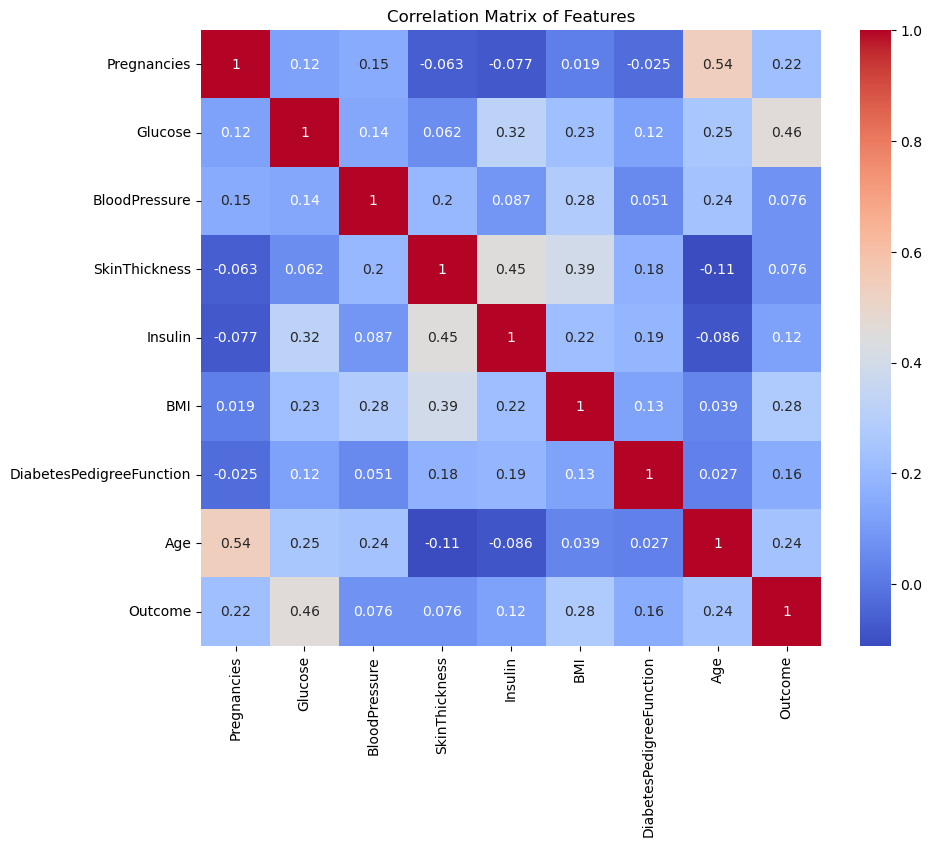

In [10]:
# Computing the correlation matrix
correlation_matrix = df.corr()

# Plotting the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Features')
plt.show()

## Data Preprocessing - Handling Missing Values

In [11]:
import numpy as np

# Replacing zero values in key columns with NaN for accurate missing value treatment
for col in columns_to_check:
    df[col].replace(0, np.nan, inplace=True)

# Handling missing values (example: replacing NaNs with the median of the column)
for col in columns_to_check:
    df[col].fillna(df[col].median(), inplace=True)


## Data Preprocessing - Removing Duplicates

In [12]:
# Removing duplicates if any
df.drop_duplicates(inplace=True)

## Data Preprocessing - Normalization/Standardization

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Normalizing/Standardizing numerical data (example: using Min-Max Scaling)
scaler = MinMaxScaler()
df[columns_to_check] = scaler.fit_transform(df[columns_to_check])

## Identify Most Relevant Features

In [14]:
# Identify features with the highest correlation to 'Outcome'
relevant_features = correlation_matrix['Outcome'].sort_values(key=abs, ascending=False)
relevant_features

Outcome                     1.000000
Glucose                     0.458421
BMI                         0.276726
Age                         0.236509
Pregnancies                 0.224437
DiabetesPedigreeFunction    0.155459
Insulin                     0.120924
SkinThickness               0.076040
BloodPressure               0.075958
Name: Outcome, dtype: float64

## Feature Engineering (Creating a New Feature)

In [15]:
# Considering feature engineering possibilities based on the correlations and dataset characteristics
# Here we can explore creating a new feature. For example, combining 'BMI' and 'Age' as they both are significant
df['BMI_Age'] = df['BMI'] * df['Age']

## Correlation Matrix of New Feature

In [16]:
# Recalculating the correlation matrix to include the new feature
# Selecting only the columns of interest based on their correlation with 'Outcome'
columns_of_interest = ['Glucose', 'BMI', 'Age', 'Pregnancies', 
                       'DiabetesPedigreeFunction', 'Insulin', 'SkinThickness', 'BloodPressure']

correlation_matrix_with_new_feature = df[['Outcome', 'BMI_Age'] + columns_of_interest].corr()

correlation_matrix_with_new_feature

,Outcome,BMI_Age,Glucose,BMI,Age,Pregnancies,DiabetesPedigreeFunction,Insulin,SkinThickness,BloodPressure
Outcome,1.000000,0.356491,0.480950,0.282712,0.242077,0.220942,0.174688,0.194465,0.200412,0.184705
BMI_Age,0.356491,1.000000,0.317255,0.812150,0.546986,0.327642,0.112393,0.178348,0.432342,0.384620
Glucose,0.480950,0.317255,1.000000,0.247789,0.251647,0.115761,0.133330,0.410158,0.198840,0.211498
BMI,0.282712,0.812150,0.247789,1.000000,0.034362,0.024303,0.136221,0.190717,0.504398,0.258704
Age,0.242077,0.546986,0.251647,0.034362,1.000000,0.536657,0.033321,0.075444,0.130709,0.328123
Pregnancies,0.220942,0.327642,0.115761,0.024303,0.536657,1.000000,-0.024800,0.045826,0.077262,0.196169
DiabetesPedigreeFunction,0.174688,0.112393,0.133330,0.136221,0.033321,-0.024800,1.000000,0.141520,0.100093,0.019339
Insulin,0.194465,0.178348,0.410158,0.190717,0.075444,0.045826,0.141520,1.000000,0.163093,0.059300
SkinThickness,0.200412,0.432342,0.198840,0.504398,0.130709,0.077262,0.100093,0.163093,1.000000,0.192806
BloodPressure,0.184705,0.384620,0.211498,0.258704,0.328123,0.196169,0.019339,0.059300,0.192806,1.000000


## Separating Features and Target Variable

In [17]:
X = df.drop('Outcome', axis=1).values  # Features
y = df['Outcome'].values               # Target Variable

## Custom Random Forest Algorithm

In [18]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.left = None
        self.right = None
        self.threshold = None
        self.index = None
        self.value = None

    def fit(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= 2 and depth <= self.max_depth:
            best_split = self._best_split(X, y, num_features)
            if best_split["gain"] > 0:
                left_idxs, right_idxs = self._split(X[:, best_split["index"]], best_split["threshold"])
                self.left = DecisionTree(self.max_depth)
                self.right = DecisionTree(self.max_depth)
                self.left.fit(X[left_idxs], y[left_idxs], depth + 1)
                self.right.fit(X[right_idxs], y[right_idxs], depth + 1)
                self.threshold = best_split["threshold"]
                self.index = best_split["index"]
                return
        self.value = self._most_common_label(y)
        
    def prune(self, X_val, y_val, threshold=0.01):
        """
        Prune the tree using a validation dataset.
        """
        # Base case: if the node is a leaf
        if self.is_leaf():
            return

        # Check if both left and right are leaves
        if self.left.is_leaf() and self.right.is_leaf():
            error_before = self._error(y_val, self.predict(X_val))
            # Predict if the node was a leaf
            predicted_value = self._most_common_label(y_val)
            error_after = self._error(y_val, np.full(y_val.shape, predicted_value))

            # If pruning reduces error
            if error_after <= error_before + threshold:
                self.make_leaf(predicted_value)
                return

        # Recursively prune left and right children
        if self.left:
            self.left.prune(X_val, y_val, threshold)
        if self.right:
            self.right.prune(X_val, y_val, threshold)

    def is_leaf(self):
        """
        Check if the node is a leaf node.
        """
        return self.value is not None

    def make_leaf(self, value):
        """
        Convert this node into a leaf node.
        """
        self.value = value
        self.left = None
        self.right = None
        self.index = None
        self.threshold = None

    def _error(self, y_true, y_pred):
        """
        Calculate the error rate.
        """
        return np.sum(y_true != y_pred) / len(y_true)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _best_split(self, X, y, num_features):
        best_gain = -1
        split = {}
        for feature_index in np.random.choice(num_features, int(np.sqrt(num_features)), replace=False):
            X_column = X[:, feature_index]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split = {"threshold": threshold, "index": feature_index, "gain": gain}
        return split

    def _information_gain(self, y, X_column, split_threshold):
        # Parent loss
        parent_entropy = entropy(y)

        # Generate split
        left_idxs, right_idxs = self._split(X_column, split_threshold)

        # Compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        if n_l == 0 or n_r == 0:
            return 0
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_threshold):
        left_idxs = np.argwhere(X_column <= split_threshold).flatten()
        right_idxs = np.argwhere(X_column > split_threshold).flatten()
        return left_idxs, right_idxs

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        if self.value is not None:
            return self.value
        if inputs[self.index] <= self.threshold:
            return self.left._predict(inputs)
        return self.right._predict(inputs)

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []
            
    def fit(self, X, y, X_val, y_val):
        self.trees = []
        for i in range(self.n_trees):
            print(f"Building tree {i+1}/{self.n_trees}")
            tree = DecisionTree(self.max_depth)
            bootstrap_idx = np.random.choice(len(X), size=len(X), replace=True)
            tree.fit(X[bootstrap_idx], y[bootstrap_idx])
            tree.prune(X_val, y_val)  # Pruning the tree
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(tree_preds.mean(axis=0))

## Splitting Train, Test and Validation Sets

In [19]:
from sklearn.model_selection import train_test_split

# Split the data into training (60%), validation (20%), and testing (20%)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)


## Instantiating the Random Forest Model with Pruning

In [20]:
# Instantiating the Random Forest model
model = RandomForest(n_trees=100, max_depth=10)

# Training the model on the training data
model.fit(X_train, y_train, X_val, y_val)

# Making predictions on the test set
predictions = model.predict(X_test)

Building tree 1/100
Building tree 2/100
Building tree 3/100
Building tree 4/100
Building tree 5/100
Building tree 6/100
Building tree 7/100
Building tree 8/100
Building tree 9/100
Building tree 10/100
Building tree 11/100
Building tree 12/100
Building tree 13/100
Building tree 14/100
Building tree 15/100
Building tree 16/100
Building tree 17/100
Building tree 18/100
Building tree 19/100
Building tree 20/100
Building tree 21/100
Building tree 22/100
Building tree 23/100
Building tree 24/100
Building tree 25/100
Building tree 26/100
Building tree 27/100
Building tree 28/100
Building tree 29/100
Building tree 30/100
Building tree 31/100
Building tree 32/100
Building tree 33/100
Building tree 34/100
Building tree 35/100
Building tree 36/100
Building tree 37/100
Building tree 38/100
Building tree 39/100
Building tree 40/100
Building tree 41/100
Building tree 42/100
Building tree 43/100
Building tree 44/100
Building tree 45/100
Building tree 46/100
Building tree 47/100
Building tree 48/100
B

In [21]:
# Calculating the accuracy of the model
accuracy = np.mean(predictions == y_test)
accuracy_percentage = accuracy * 100

accuracy_percentage

73.15436241610739

## Instantiating the Random Forest Model without Pruning

In [22]:
import numpy as np

class DecisionTree:
    def __init__(self, max_depth):
        self.max_depth = max_depth
        self.left = None
        self.right = None
        self.threshold = None
        self.index = None
        self.value = None

    def fit(self, X, y, depth=0):
        num_samples, num_features = X.shape
        if num_samples >= 2 and depth <= self.max_depth:
            best_split = self._best_split(X, y, num_features)
            if best_split["gain"] > 0:
                left_idxs, right_idxs = self._split(X[:, best_split["index"]], best_split["threshold"])
                self.left = DecisionTree(self.max_depth)
                self.right = DecisionTree(self.max_depth)
                self.left.fit(X[left_idxs], y[left_idxs], depth + 1)
                self.right.fit(X[right_idxs], y[right_idxs], depth + 1)
                self.threshold = best_split["threshold"]
                self.index = best_split["index"]
                return
        self.value = self._most_common_label(y)

    def _most_common_label(self, y):
        return np.bincount(y).argmax()

    def _best_split(self, X, y, num_features):
        best_gain = -1
        split = {}
        for feature_index in np.random.choice(num_features, int(np.sqrt(num_features)), replace=False):
            X_column = X[:, feature_index]
            thresholds = np.unique(X_column)
            for threshold in thresholds:
                gain = self._information_gain(y, X_column, threshold)
                if gain > best_gain:
                    best_gain = gain
                    split = {"threshold": threshold, "index": feature_index, "gain": gain}
        return split

    def _information_gain(self, y, X_column, split_threshold):
        # Parent loss
        parent_entropy = entropy(y)

        # Generate split
        left_idxs, right_idxs = self._split(X_column, split_threshold)

        # Compute the weighted avg. of the loss for the children
        n = len(y)
        n_l, n_r = len(left_idxs), len(right_idxs)
        if n_l == 0 or n_r == 0:
            return 0
        e_l, e_r = entropy(y[left_idxs]), entropy(y[right_idxs])
        child_entropy = (n_l / n) * e_l + (n_r / n) * e_r

        # Information gain
        ig = parent_entropy - child_entropy
        return ig

    def _split(self, X_column, split_threshold):
        left_idxs = np.argwhere(X_column <= split_threshold).flatten()
        right_idxs = np.argwhere(X_column > split_threshold).flatten()
        return left_idxs, right_idxs

    def predict(self, X):
        return np.array([self._predict(inputs) for inputs in X])

    def _predict(self, inputs):
        if self.value is not None:
            return self.value
        if inputs[self.index] <= self.threshold:
            return self.left._predict(inputs)
        return self.right._predict(inputs)

def entropy(y):
    hist = np.bincount(y)
    ps = hist / len(y)
    return -np.sum([p * np.log2(p) for p in ps if p > 0])

class RandomForest:
    def __init__(self, n_trees=10, max_depth=10):
        self.n_trees = n_trees
        self.max_depth = max_depth
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for i in range(self.n_trees):
            print(f"Building tree {i+1}/{self.n_trees}")
            tree = DecisionTree(self.max_depth)
            bootstrap_idx = np.random.choice(len(X), size=len(X), replace=True)
            tree.fit(X[bootstrap_idx], y[bootstrap_idx])
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        return np.round(tree_preds.mean(axis=0))


In [23]:
# Instantiating the Random Forest model
model = RandomForest(n_trees=100, max_depth=10)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

Building tree 1/100
Building tree 2/100
Building tree 3/100
Building tree 4/100
Building tree 5/100
Building tree 6/100
Building tree 7/100
Building tree 8/100
Building tree 9/100
Building tree 10/100
Building tree 11/100
Building tree 12/100
Building tree 13/100
Building tree 14/100
Building tree 15/100
Building tree 16/100
Building tree 17/100
Building tree 18/100
Building tree 19/100
Building tree 20/100
Building tree 21/100
Building tree 22/100
Building tree 23/100
Building tree 24/100
Building tree 25/100
Building tree 26/100
Building tree 27/100
Building tree 28/100
Building tree 29/100
Building tree 30/100
Building tree 31/100
Building tree 32/100
Building tree 33/100
Building tree 34/100
Building tree 35/100
Building tree 36/100
Building tree 37/100
Building tree 38/100
Building tree 39/100
Building tree 40/100
Building tree 41/100
Building tree 42/100
Building tree 43/100
Building tree 44/100
Building tree 45/100
Building tree 46/100
Building tree 47/100
Building tree 48/100
B

In [24]:
# Calculating the accuracy of the model
accuracy = np.mean(predictions == y_test)
accuracy_percentage = accuracy * 100

accuracy_percentage

79.19463087248322

## Instantiating The Model With The Depth Parameter Doubled

In [25]:
# Instantiating the Random Forest model
model = RandomForest(n_trees=100, max_depth=20)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

Building tree 1/100
Building tree 2/100
Building tree 3/100
Building tree 4/100
Building tree 5/100
Building tree 6/100
Building tree 7/100
Building tree 8/100
Building tree 9/100
Building tree 10/100
Building tree 11/100
Building tree 12/100
Building tree 13/100
Building tree 14/100
Building tree 15/100
Building tree 16/100
Building tree 17/100
Building tree 18/100
Building tree 19/100
Building tree 20/100
Building tree 21/100
Building tree 22/100
Building tree 23/100
Building tree 24/100
Building tree 25/100
Building tree 26/100
Building tree 27/100
Building tree 28/100
Building tree 29/100
Building tree 30/100
Building tree 31/100
Building tree 32/100
Building tree 33/100
Building tree 34/100
Building tree 35/100
Building tree 36/100
Building tree 37/100
Building tree 38/100
Building tree 39/100
Building tree 40/100
Building tree 41/100
Building tree 42/100
Building tree 43/100
Building tree 44/100
Building tree 45/100
Building tree 46/100
Building tree 47/100
Building tree 48/100
B

In [26]:
# Calculating the accuracy of the model
accuracy = np.mean(predictions == y_test)
accuracy_percentage = accuracy * 100

accuracy_percentage

76.51006711409396

## Instantiating the Model with Depth and Number of Tree Parameters Doubled

In [27]:
# Instantiating the Random Forest model
model = RandomForest(n_trees=200, max_depth=20)

# Training the model on the training data
model.fit(X_train, y_train)

# Making predictions on the test set
predictions = model.predict(X_test)

Building tree 1/200
Building tree 2/200
Building tree 3/200
Building tree 4/200
Building tree 5/200
Building tree 6/200
Building tree 7/200
Building tree 8/200
Building tree 9/200
Building tree 10/200
Building tree 11/200
Building tree 12/200
Building tree 13/200
Building tree 14/200
Building tree 15/200
Building tree 16/200
Building tree 17/200
Building tree 18/200
Building tree 19/200
Building tree 20/200
Building tree 21/200
Building tree 22/200
Building tree 23/200
Building tree 24/200
Building tree 25/200
Building tree 26/200
Building tree 27/200
Building tree 28/200
Building tree 29/200
Building tree 30/200
Building tree 31/200
Building tree 32/200
Building tree 33/200
Building tree 34/200
Building tree 35/200
Building tree 36/200
Building tree 37/200
Building tree 38/200
Building tree 39/200
Building tree 40/200
Building tree 41/200
Building tree 42/200
Building tree 43/200
Building tree 44/200
Building tree 45/200
Building tree 46/200
Building tree 47/200
Building tree 48/200
B

In [28]:
# Calculating the accuracy of the model
accuracy = np.mean(predictions == y_test)
accuracy_percentage = accuracy * 100

accuracy_percentage

79.86577181208054

## Import Necessary Libraries For Comparing the Model With Other Classifiers

In [29]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, roc_curve
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

## Calculate the Accuracy, Precision, Recall and AUC-ROC of The Model

In [30]:
my_rf_predictions = predictions

# Calculate metrics
my_rf_accuracy = accuracy_score(y_test, my_rf_predictions)
my_rf_precision = precision_score(y_test, my_rf_predictions)
my_rf_recall = recall_score(y_test, my_rf_predictions)
my_rf_auc = roc_auc_score(y_test, my_rf_predictions)

print(f"Accuracy: {my_rf_accuracy:.2f}")
print(f"Precision: {my_rf_precision:.2f}")
print(f"Recall: {my_rf_recall:.2f}")
print(f"AUC-ROC: {my_rf_auc:.2f}")


Accuracy: 0.80
Precision: 0.74
Recall: 0.71
AUC-ROC: 0.78


## Plot the ROC Curve 

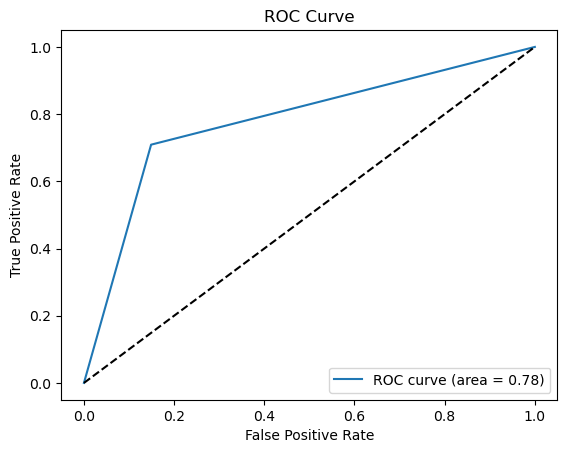

In [31]:
fpr, tpr, thresholds = roc_curve(y_test, my_rf_predictions)
plt.figure()
plt.plot(fpr, tpr, label=f'ROC curve (area = {my_rf_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()


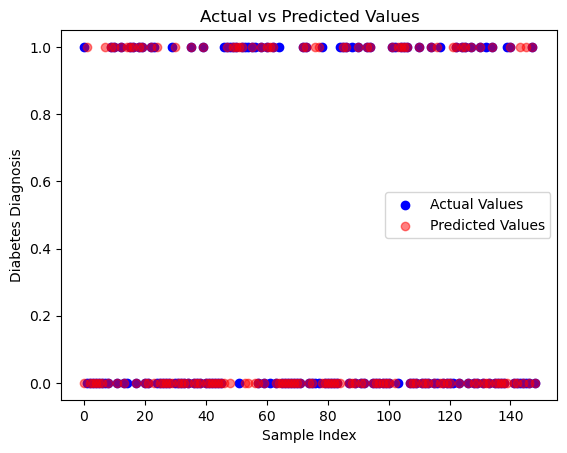

In [32]:
plt.figure()
plt.scatter(range(len(y_test)), y_test, color='blue', label='Actual Values')
plt.scatter(range(len(my_rf_predictions)), my_rf_predictions, color='red', alpha=0.5, label='Predicted Values')
plt.title('Actual vs Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Diabetes Diagnosis')
plt.legend()
plt.show()

## Define Other Classifiers For Comparison

In [33]:
# Define and train other classifiers
classifiers = {
    "Scikit-learn RandomForest": RandomForestClassifier(n_estimators=100, max_depth=10),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Machine": SVC(probability=True)
}

# Fit models and store results
results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    predictions = clf.predict(X_test)
    accuracy = accuracy_score(y_test, predictions)
    precision = precision_score(y_test, predictions)
    recall = recall_score(y_test, predictions)
    auc = roc_auc_score(y_test, predictions)
    results[name] = [accuracy, precision, recall, auc]
    
    # Add my custom model's results
results["My Custom RandomForest"] = [my_rf_accuracy, my_rf_precision, my_rf_recall, my_rf_auc]

# Convert results to DataFrame for easier visualization
results_df = pd.DataFrame(results, index=["Accuracy", "Precision", "Recall", "AUC-ROC"]).T


## Plot the Results of All Models

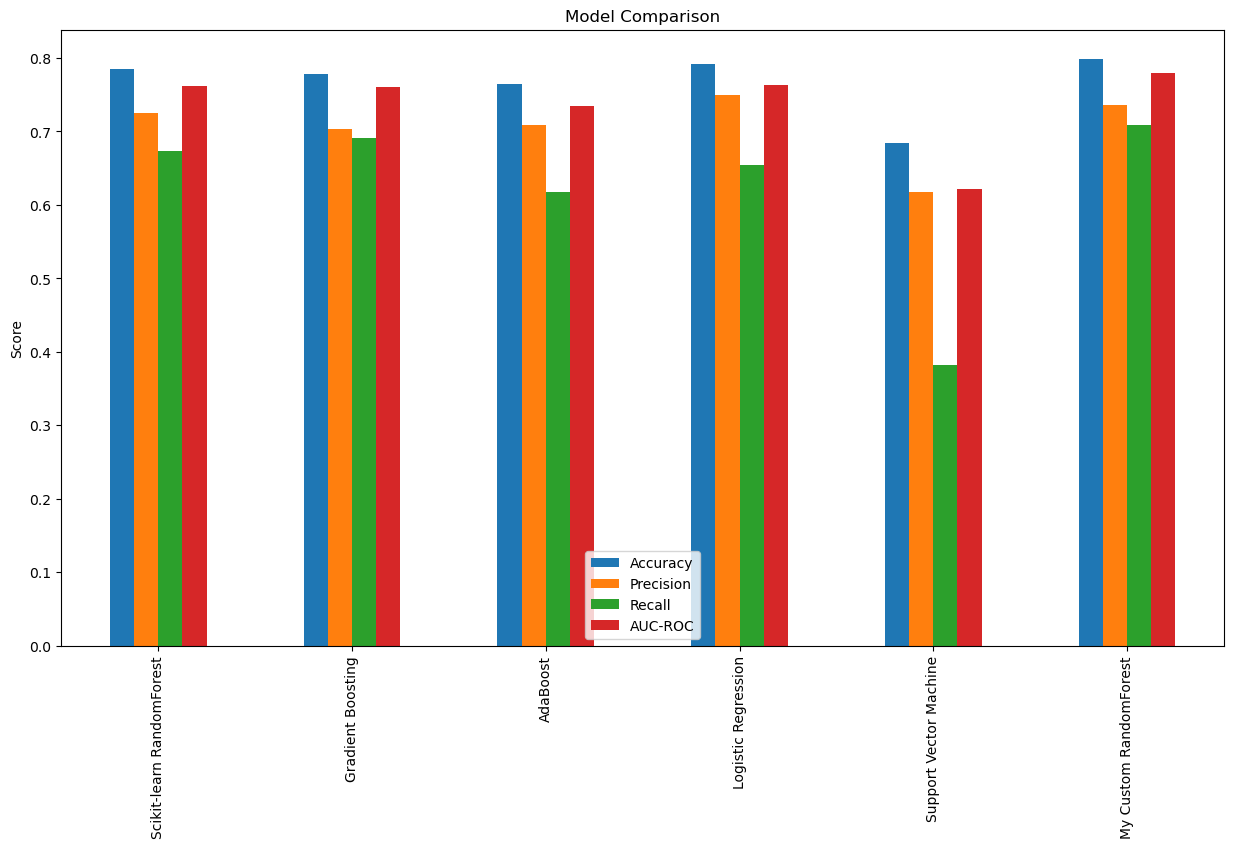

In [34]:
# Plotting the results
results_df.plot(kind='bar', figsize=(15, 8))
plt.title('Model Comparison')
plt.ylabel('Score')
plt.show()


## Plot the ROC Curve of All Models

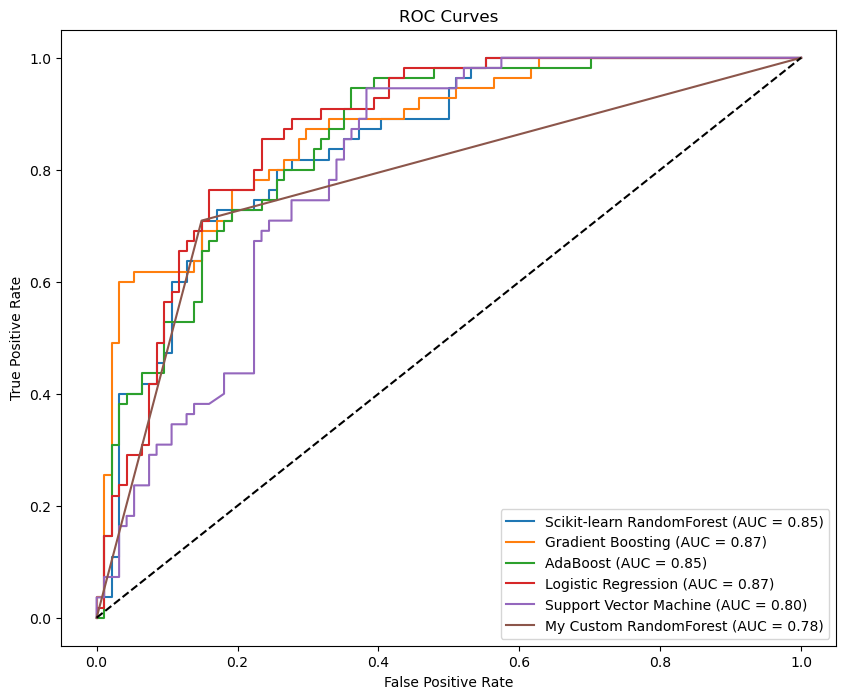

In [35]:
plt.figure(figsize=(10, 8))

# Plot ROC Curve for each model
for name, clf in classifiers.items():
    y_scores = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_scores):.2f})")

# Add your custom model's ROC curve
fpr, tpr, _ = roc_curve(y_test, my_rf_predictions)
plt.plot(fpr, tpr, label=f"My Custom RandomForest (AUC = {my_rf_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()


In [36]:
print('Ayşe Begüm Nur, 1901042613')

Ayşe Begüm Nur, 1901042613
